In [1]:
import warnings

import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

import urllib
import os
import zipfile
from defects_dlmbl.datamodules import WingDataModule
from defects_dlmbl.datasets import WingDataset
from tempfile import TemporaryFile
from defects_dlmbl.unetmodule import UNetModuleWithBCEAux as un
from defects_dlmbl.datamodules import NMJDataModule
from defects_dlmbl.datasets import NMJDataset

In [2]:
train_path = '/home/delsignores/defects_DLMBL/data/Flywing_n0/train/train_data_blackout.npz'
test_path = '/home/delsignores/defects_DLMBL/data/Flywing_n0/test/test_data.npz'

In [3]:
test_data =  np.load('/home/delsignores/defects_DLMBL/data/Flywing_n0/test/test_data.npz')
test_images = test_data['X_test'].astype(np.float32)
test_masks = test_data['Y_test']


In [4]:
model = un()
model = model.load_from_checkpoint('/home/delsignores/defects_DLMBL/experiments/lightning_logs/version_77/checkpoints/sample-mnist-epoch249-val_loss0.13.ckpt')

In [5]:
dm = WingDataModule(train_path, test_path)
dm.setup()
dl = dm.test_dataloader()

torch.Size([8, 4, 128, 128])


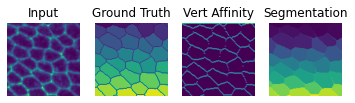

In [34]:
ix = 1
for batch in dl:
    print(batch[1].shape)
    for i, img in enumerate(batch):
        a=model.test_step(batch, i)
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(batch[0][ix][0])
        ax[0].axis('off')
        ax[0].set_title('Input')
        ax[1].imshow(batch[2][ix][0])
        ax[1].axis('off')
        ax[1].set_title('Ground Truth')
        ax[2].imshow(batch[1][ix][0])
        ax[2].set_title('Vert Affinity')
        ax[2].axis('off')
        ax[3].imshow(a[ix][0])
        ax[3].set_title('Segmentation')
        ax[3].axis('off')
        break
    break

In [7]:
paz_data = '/home/delsignores/defects_DLMBL/data/NMJ_training_data_crop/'
pazm = NMJDataModule(paz_data)

In [8]:
pazm.setup()

In [9]:
pazl=pazm.test_dataloader()

In [15]:
for batch in pazl:
    print(batch[1].shape)
    break

torch.Size([3, 4, 240, 240])


(3, 1, 240, 240)


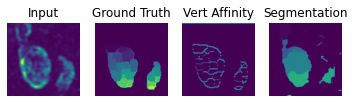

In [33]:
ix = 2
for batch in pazl:
    for i, img in enumerate(batch):
        a=model.test_step(batch, i)
        print(a.shape)
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(batch[0][ix][0])
        ax[0].axis('off')
        ax[0].set_title('Input')
        ax[1].imshow(batch[2][ix][0])
        ax[1].axis('off')
        ax[1].set_title('Ground Truth')
        ax[2].imshow(batch[1][ix][0])
        ax[2].set_title('Vert Affinity')
        ax[2].axis('off')
        ax[3].imshow(a[ix][0])
        ax[3].set_title('Segmentation')
        ax[3].axis('off')
        break
    break